# Urban Sound Classification: Deep Learning Approaches for Audio Recognition
## Machine Learning II
#### Work assembled by Beatriz Pereira, Carolina Leite, Lara Gonçalves

### Table of contents <a name="contents"></a>
1. [Introduction](#introduction)
2. [Data Understanding](#data-understanding)
3. [Data Reading](#data-reading)
    - 3.1. [Feature Extraction](#feature-extraction)
    - 3.2. [Data Cleaning](#data-cleaning)
      
      - 3.2.1. [Reading](#reading)
      
      - 3.2.2. [Cleaning](#cleaning)
     
4. [Modeling](#modeling)

## 1. Introduction <a name="introduction"></a>
[[go back to the top]](#contents)

The objective of this project is to develop **deep learning classifiers** for urban sound data. In this assignment, we will implement two of the three classifiers provided by the professor, as outlined in the [[PDF]](AC2_Project_20252026.pdf). 

The classifiers are:

• A classifier based on a multilayer perceptron (MLP)

• A classifier based on a convolutional neural network (CNN)

• A classifier based on a recurrent neural network (RNN)

And for each of the chosen classifier, the implementation will need to consider the following steps:
1. Data pre-processing and preparation
2. Model architecture definition
3. Training strategies
4. Performance evaluation

## 2. Data Understanding <a name="data-understanding"></a>
[[go back to the top]](#contents)

The dataset consists of 8,732 labeled sound excerpts, each lasting up to 4 seconds, categorized into 10 distinct classes:
- air_conditioner [0] 
- car_horn [1] 
- children_playing [2] 
- dog_bark [3] 
- drilling [4] 
- enginge_idling [5] 
- gun_shot [6] 
- jackhammer [7] 
- siren [8] 
- street_music [9] 

The sound classes in the UrbanSound and UrbanSound8K datasets are derived from the UrbanSound taxonomy, as presented on the https://urbansounddataset.weebly.com/taxonomy.html

Below is an image showcasing the taxonomy structure from the referenced site:

![Urban_Sound_Taxonomy](./images/urban_sound_taxonomy.png)

All audio excerpts are derived from field recordings uploaded to http://www.freesound.org/

The dataset comprises 8,732 urban sound audio files in WAV format. The sampling rate, bit depth, and number of channels correspond to those of the original files uploaded to Freesound, which may vary across different recordings.

In addition to the audio excerpts, a CSV file containing metadata for each excerpt is also included.

This is a short explanation of the csv:

| Name of the Column | Brief Explanation                                                                                       |
|--------------------|--------------------------------------------------------------------------------------------------------|
| slice_file_name    | The name of the audio file, formatted as [fsID]-[classID]-[occurrenceID]-[sliceID].wav.              |
| fsID               | The Freesound ID of the recording from which this excerpt (slice) is taken.                           |
| start              | The start time of the slice in the original Freesound recording.                                      |
| end                | The end time of the slice in the original Freesound recording.                                        |
| salience           | A subjective salience rating of the sound (1 = foreground, 2 = background).                           |
| fold               | The fold number (1-10) to which this file has been allocated.                                         |
| classID            | A numeric identifier of the sound class (0-9) as listed above.                                        |
| [occurrenceID]     | A numeric identifier to distinguish different occurrences of the sound within the original recording. |
| [sliceID]          | A numeric identifier to distinguish different slices taken from the same occurrence.                 |


**To avoid common pitfalls**:
-  Don't reshuffle the data! Use the predefined 10 folds and perform 10-fold (not 5-fold) cross validation
-  Don't evaluate just on one split! Use 10-fold (not 5-fold) cross validation and average the scores

## 3. Data Reading <a name="data-reading"></a>
[[go back to the top]](#contents)


After carefully analyzing the three available classifiers, we decided to implement CNN and RNN for this project. Our decision was based on several important considerations, which we have outlined in detail in the following [[Summary]](Research/Summary.md).


### Librosa vs Scipy.io

**Librosa:** is a library specialized in audio analysis and manipulation for machine learning and digital signal processing. It provides a wide range of tools aimed at feature extraction and audio representations.

- Pros:
    - Supports various audio formats (.wav, .mp3, etc.).
    - Advanced feature extraction: Mel Spectrograms, MFCCs, Chromagrams.
    - Easy audio manipulation (resampling, padding, normalization).
    - Integration with visualizations (spectrograms, MFCCs).

- Cons:
    - Slower for simple tasks (loading/saving audio).
    - Steeper learning curve for beginners.
    - Depends on external libraries (audioread, ffmpeg).

**Scipy.io:** is part of the SciPy library and is a simple and efficient tool for reading and writing .wav files. It is useful for basic audio manipulation tasks.

- Pros:
    - Simple, fast, and efficient for loading/saving .wav files.
    - Direct integration with NumPy for basic manipulation.

- Cons:
    - Limited to .wav files.
    - Does not support advanced feature degradation.
    - Does not offer resampling, padding, or integrated views.

Let's briefly analyze the differences between librosa and scipy.io.

In [ ]:
!pip install librosa

In [ ]:
import librosa
import scipy.io.wavfile as wav

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/260.7 kB ? eta -:--:--
   --- ------------------------------------ 20.5/260.7 kB ? eta -:--:--
   ------------------------------- -------- 204.8/260.7 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 260.7/260.7 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   -------- ------------------------------- 0.2/1.0 MB 6.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.0 MB 4.0 MB/s eta 0:00:01
   ------------------------- -------------- 0.6/1.0 MB 4.5 MB/s eta 0:00:01
   -------------------------------- ------- 0.8/1.0 MB 4.4 MB/s eta 0:00:01
   -------------------------------------- - 1.0/1.0 MB 4.1 MB/s eta 0:00:01
   -------------------

In [13]:
filename = r"UrbanSound8K\audio\fold1\7061-6-0-0.wav"

In [14]:
librosa_audio, librosa_sample_rate = librosa.load(filename)
scipy_sample_rate, scipy_audio = wav.read(filename)

In [15]:
print("Librosa sample wave rate:", librosa_sample_rate)
print("Scipy sample wave rate : " , scipy_sample_rate )

Librosa sample wave rate: 22050
Scipy sample wave rate :  44100


In [16]:
print("Librosa audio signal " , librosa_audio)
print("Librosa audio data type:", librosa_audio.dtype)
print()
print("Scipy audio signal" , scipy_audio)
print("Scipy audio data type:", scipy_audio.dtype)

Librosa audio signal  [-7.4505806e-09  2.9802322e-08  4.8428774e-08 ...  1.0127544e-05
  2.3271263e-05  7.0009992e-06]
Librosa audio data type: float32

Scipy audio signal [[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [1 1]
 [0 0]]
Scipy audio data type: int16


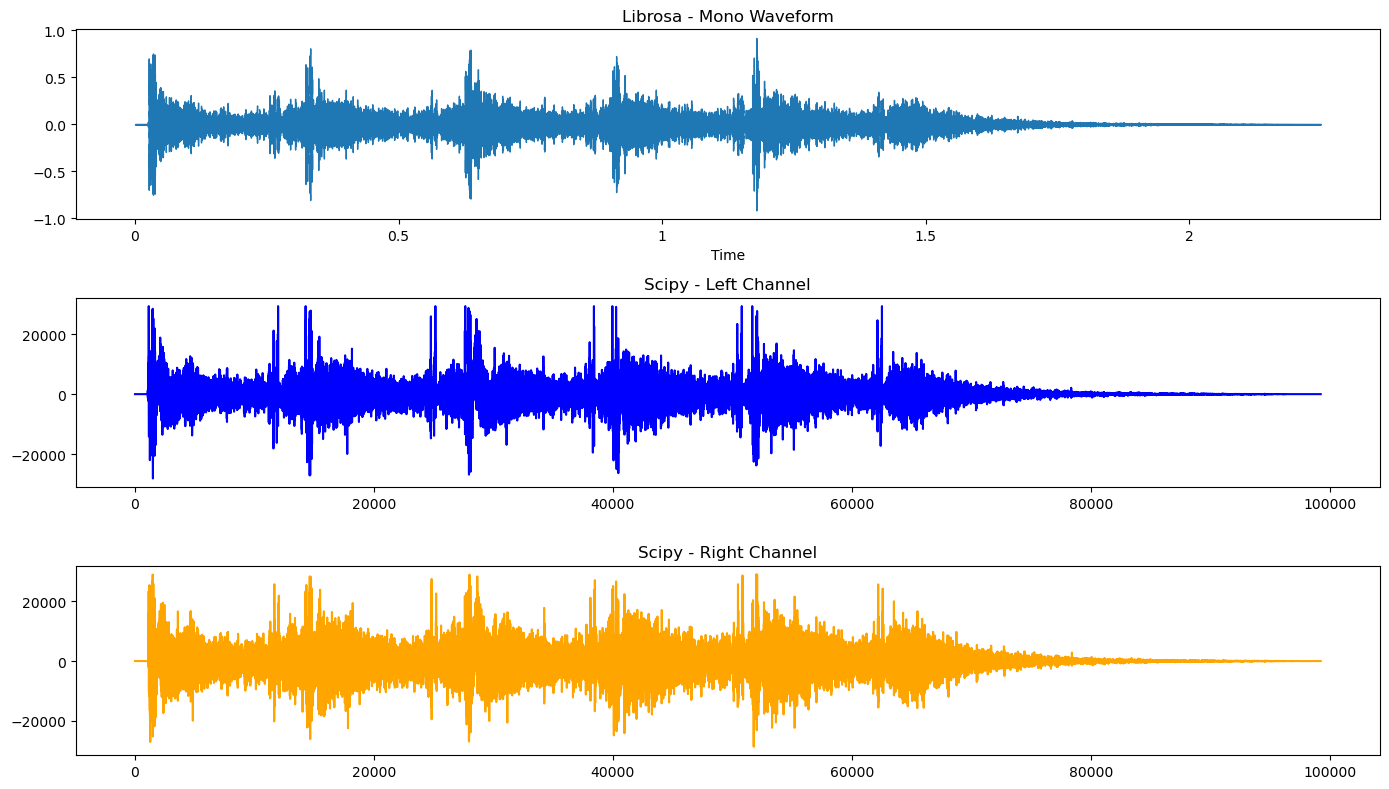

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # Ajuste o tamanho da figura para mais altura

# Plot librosa mono waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(librosa_audio, sr=librosa_sample_rate)
plt.title("Librosa - Mono Waveform")

# Plot scipy stereo waveform (each channel separately if stereo)
# Plot left and right channels in separate subplots
plt.subplot(3, 1, 2)
if scipy_audio.ndim > 1:  # Stereo
    plt.plot(scipy_audio[:, 0], label="Left Channel", color='blue')
    plt.title("Scipy - Left Channel")

    plt.subplot(3, 1, 3)
    plt.plot(scipy_audio[:, 1], label="Right Channel", color='orange')
    plt.title("Scipy - Right Channel")
else:  # Mono
    plt.plot(scipy_audio)
    plt.title("Scipy - Mono Waveform")

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Taking into account all the pros and cons previously mentioned, we decided that for this work **we will use librosa**, as it offers more advantages for this type of project. Furthermore, it allows, by default, converting all audio to a sampling rate of 22050 Hz (normally used in audio learning and processing models), converting audio into a single signal (mono sound), and also normalizing audio, unlike scipy, which converts audio into arrays.

#### Imports

In [18]:
import pandas as pd
import librosa
import os
import numpy as np
import soundfile as sf
from sklearn.preprocessing import MinMaxScaler
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [19]:
path_csv = 'UrbanSound8K/metadata/UrbanSound8K.csv'

df = pd.read_csv(path_csv)

print(df.head())

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


##### Check if there's any missing values

In [20]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64


c:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


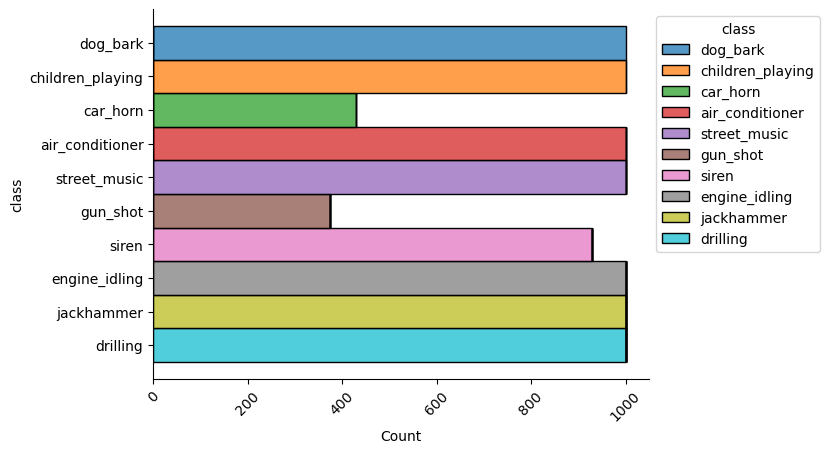

In [21]:
ax = sns.histplot(y='class',data = df, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
sns.despine()
plt.show()

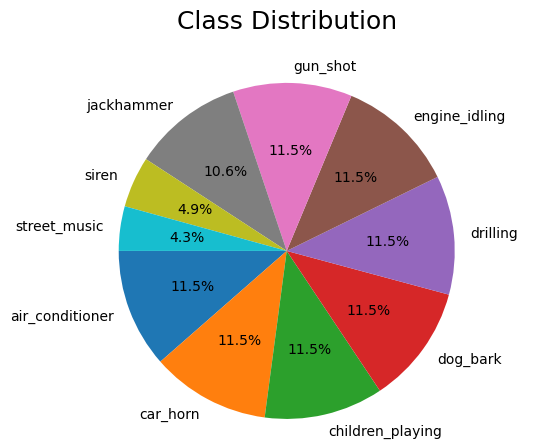

In [22]:
class_dict = df['class'].value_counts(normalize=True)
classes = list(np.unique(df['class']))
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08, fontsize=18)
ax.pie(class_dict, labels=classes, autopct='%1.1f%%', shadow=False, startangle=180)
ax.axis('equal')
plt.show(block=False)

##### Accessing the audio data

In [23]:
# Path to the folder where the audio dubs are located
base_path = 'UrbanSound8K/audio'

# Go through the 10 folds
for fold in range(1, 11):
    fold_path = os.path.join(base_path, f'fold{fold}')
    
    # Check if the folder path exists
    if os.path.exists(fold_path):
        # Browse the audio files within the fold
        for file_name in os.listdir(fold_path):
            if file_name.endswith('.wav'):
                # Full path to the audio file
                file_path = os.path.join(fold_path, file_name)
                
                # Upload audio using librosa
                audio, sample_rate = librosa.load(file_path)
                
                # Example: Process audio or extract features
                print(f"File: {file_name}, Sample Rate: {sample_rate}, Duration: {len(audio)/sample_rate:.2f}s")


File: 101415-3-0-2.wav, Sample Rate: 22050, Duration: 4.00s
File: 101415-3-0-3.wav, Sample Rate: 22050, Duration: 4.00s
File: 101415-3-0-8.wav, Sample Rate: 22050, Duration: 4.00s
File: 102106-3-0-0.wav, Sample Rate: 22050, Duration: 1.64s
File: 102305-6-0-0.wav, Sample Rate: 22050, Duration: 2.61s
File: 102842-3-0-1.wav, Sample Rate: 22050, Duration: 4.00s
File: 102842-3-1-0.wav, Sample Rate: 22050, Duration: 4.00s
File: 102842-3-1-5.wav, Sample Rate: 22050, Duration: 4.00s
File: 102842-3-1-6.wav, Sample Rate: 22050, Duration: 4.00s
File: 103074-7-0-0.wav, Sample Rate: 22050, Duration: 4.00s
File: 103074-7-0-1.wav, Sample Rate: 22050, Duration: 4.00s
File: 103074-7-0-2.wav, Sample Rate: 22050, Duration: 4.00s
File: 103074-7-1-0.wav, Sample Rate: 22050, Duration: 4.00s
File: 103074-7-1-1.wav, Sample Rate: 22050, Duration: 4.00s
File: 103074-7-1-2.wav, Sample Rate: 22050, Duration: 4.00s
File: 103074-7-1-3.wav, Sample Rate: 22050, Duration: 4.00s
File: 103074-7-1-4.wav, Sample Rate: 220

##### As observed, some audio clips have varying durations, such as 1.64, 2.61, and up to 4 seconds. To simplify the processing and ensure consistency, we will standardize all audio data to the same length. This allows for uniform input to our models, improving training efficiency and performance. How can we do that?

##### Well, there's four strategies:
- **Zeropadding:** Ideal for maintaining the integrity of short audios.
- **Audio Repetition:** Works well for rhythmic or repetitive sounds.
- **Discard Short Audios:** Simple and effective when you can afford to lose some data.
- **Interpolation:** Suitable if you want to maintain consistency in the timing of the audio, but can change the way it sounds.

